# Importing Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import os 
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# Data preprocessing
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
# Check imbalance dataset
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [8]:
ham.shape

(4825, 4)

In [9]:
spam.shape

(747, 4)

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [12]:
# Balance the dataset
data = ham.append(spam, ignore_index=True)
data.shape

(1494, 4)

In [13]:
data.head()

,label,message,length,punct
0,ham,Gain the rights of a wife.dont demand it.i am ...,76,3
1,ham,Pls what's the full name of joke's school cos ...,124,8
2,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,51,3
3,ham,Lmao but its so fun...,22,3
4,ham,"HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE L...",58,3


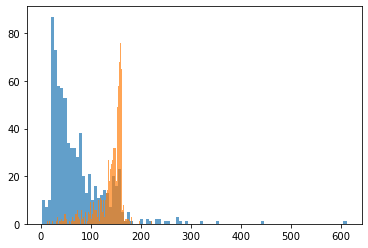

In [14]:
# vizualization by using ham and spam 

plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

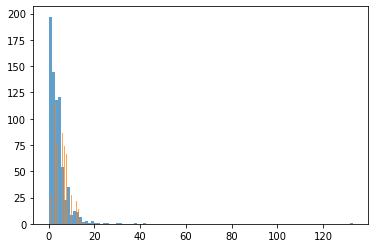

In [15]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [16]:
# split the data into training and test for building model and prediction/evaluation

from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.7, random_state=100)

In [18]:
# Build classification model
from sklearn.feature_extraction.text import TfidfVectorizer

# machine learning algorithm - SupportVectorClassifier
from sklearn.svm import SVC

# pipeline package to merge nlp and machine learning together and get the output
from sklearn.pipeline import Pipeline

In [19]:
svc_classifier = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC(C=100, gamma='auto'))])

In [20]:
svc_classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=100, gamma='auto'))])

In [21]:
# predict the model by using test dataset

y_pred = svc_classifier.predict(x_test)

In [22]:
# Evaluation - confusion_matrix, classification_repot, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
print(confusion_matrix(y_test, y_pred))

[[520   2]
 [223 301]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.70      1.00      0.82       522
        spam       0.99      0.57      0.73       524

    accuracy                           0.78      1046
   macro avg       0.85      0.79      0.78      1046
weighted avg       0.85      0.78      0.77      1046



In [25]:
print(accuracy_score(y_test, y_pred))

0.7848948374760994


In [26]:
# check your model performance

test1 = ['Hello, Hope you are doing well.']
test2 = ['Hi, you are learning Natural Language Processing']
test3 = ['Hope you are doing well and learning new things !']
test4 = ['Congratulations, You won a lottery ticket worth $10 Millons ! To claim call @11111']

In [28]:
# SVM
print(svc_classifier.predict(test1))
print(svc_classifier.predict(test2))
print(svc_classifier.predict(test3))
print(svc_classifier.predict(test4))

['ham']
['ham']
['ham']
['spam']
